# Saudi Arabia Used Car 

__Latar Belakang:__
Perusahaan dealer mobil bekas dihadapkan pada tantangan yang signifikan ketika menentukan harga jual untuk kendaraan yang mereka tawarkan. Kesulitan muncul karena setiap penyesuaian harga harus dipertimbangkan dengan cermat. Jika harga ditetapkan terlalu tinggi, risiko kendaraan tidak laku terjual akan meningkat, mengancam profitabilitas dan likuiditas perusahaan. Sebaliknya, jika harga ditetapkan terlalu rendah, perusahaan berisiko mengalami kerugian finansial yang serius.

Dengan memahami kompleksitas pasar mobil bekas yang dinamis, penelitian ini bertujuan untuk mengembangkan penentuan harga yang optimal. Tujuannya tidak hanya untuk meminimalkan risiko kerugian finansial bagi perusahaan, tetapi juga untuk mempertahankan posisi daya saing yang kuat di pasar yang sangat kompetitif.  

__Masalah__
Bagaimana menentukan harga yang optimal untuk mobil bekas agar perusahaan tidak mengalami kerugian finansial dan tetap kompetitif di pasar?

__Tujuan:__
Memberikan informasi data harga mobil bekas yang optimal dengan menyelidiki berbagai faktor yang memengaruhi harga mobil bekas serta merumuskan pendekatan yang efektif untuk menetapkan harga yang memperhitungkan berbagai variabel, seperti kondisi pasar, permintaan konsumen, dan atribut kendaraan. Dengan demikian, penelitian ini akan memberikan kontribusi yang berharga dalam menghadapi tantangan kompleks yang dihadapi oleh perusahaan dealar mobil bekas dalam menentukan harga yang tepat untuk produk mereka.


__Pendekatan Analitik__
Langkah pertama adalah melakukan analisis mendalam terhadap data untuk mengidentifikasi pola yang membedakan mobil satu dengan lainnya.
Selanjutnya, kami akan mengembangkan model regresi untuk menyediakan alat prediksi harga yang optimal untuk harga mobil bekas yang akan dijual. 

__Penilaian Metrik__

Untuk mengevaluasi kinerja model, kami akan menggunakan metrik seperti RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). RMSE mengukur seberapa jauh rata-rata prediksi model dari nilai yang diamati, sedangkan MAE memberikan gambaran rata-rata dari seberapa besar kesalahan prediksi dalam nilai absolut. MAPE menyajikan rata-rata persentase kesalahan prediksi oleh model. Semakin kecil nilai RMSE, MAE, dan MAPE, semakin baik kualitas prediksi model.

Selain itu, untuk model linear, kami akan mengevaluasi R-squared atau R-squared yang disesuaikan. R-squared memberikan indikasi seberapa baik model memadankan data observasi, dengan nilai mendekati 1 menunjukkan kesesuaian yang lebih baik. Namun, perlu dicatat bahwa metrik ini tidak cocok untuk model non-linear.


## Data Understanding

- Type        : Tipe mobil bekas.
- Region      : Wilayah di mana mobil bekas ditawarkan untuk dijual.
- Make        : Nama perusahaan.
- Gear_Type   : Jenis transmisi mobil bekas.
- Origin      : Asal mobil bekas.
- Options     : Pilihan atau fitur tambahan dari mobil bekas.
- Year        : Tahun pembuatan.
- Engine_Size : Ukuran mesin mobil bekas.
- Mileage     : Jarak tempuh mobil bekas.
- Negotiable  : Benar jika harga adalah 0, yang berarti harganya bisa dinegosiasikan.
- Price       : Harga mobil bekas.


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Pada kolom price ada missing value maka harus dilakukan data cleaning

# Exploratory Data Analysis

Pada machine learning, tujuan dari proses EDA (Exploratory Data Analysis) adalah untuk memahami data yang digunakan dalam model dan menemukan pola atau hubungan yang mungkin berguna dalam pembuatan model. Proses EDA sangat penting karena dapat membantu mengidentifikasi keanehan, kesalahan, atau asumsi yang salah dalam data, serta mempersiapkan data untuk pemodelan dengan cara yang paling efektif. Berikut adalah tujuan dan langkah-langkah umum dalam proses EDA:
Memahami Struktur Data: Langkah awal dalam EDA adalah memahami struktur data, termasuk jumlah baris dan kolom, tipe data dari setiap kolom, serta adanya nilai yang hilang atau outlier.

Analisis Statistik Deskriptif: Melakukan analisis statistik deskriptif seperti mean, median, dan standar deviasi untuk mendapatkan gambaran umum tentang distribusi variabel dan karakteristik data lainnya.

Visualisasi Data: Menggunakan visualisasi seperti histogram, box plot, scatter plot, dan heatmap untuk memvisualisasikan distribusi variabel, hubungan antar variabel, dan pola-pola lain dalam data.

Identifikasi Outlier: Mengidentifikasi dan menangani nilai outlier yang mungkin mempengaruhi kinerja model.

Penanganan Data Hilang: Memeriksa dan menangani nilai yang hilang dalam data, baik dengan menghapus baris atau kolom yang memiliki nilai yang hilang atau mengisi nilai yang hilang dengan estimasi yang sesuai.

Analisis Korelasi: Mengidentifikasi korelasi antar variabel untuk menentukan variabel mana yang memiliki hubungan yang kuat atau lemah dengan variabel target.

Analisis Distribusi dan Transformasi: Melakukan analisis distribusi untuk mengevaluasi apakah data mengikuti distribusi tertentu dan mungkin memerlukan transformasi seperti log atau sqrt untuk meningkatkan normalitas.

Analisis Variabel Kategorikal: Untuk variabel kategorikal, mengidentifikasi distribusi kategori, melihat frekuensi masing-masing kategori, dan mempertimbangkan apakah perlu dilakukan pengkodean ulang atau pengelompokan kategori.

Tujuan akhir dari proses EDA adalah untuk memberikan pemahaman yang mendalam tentang data yang akan digunakan dalam model, serta mempersiapkan data tersebut untuk pemodelan dengan cara yang paling efektif. Dengan pemahaman yang baik tentang data, kita dapat membuat model yang lebih akurat dan relevan dengan tujuan analisis yang ingin dicapai.

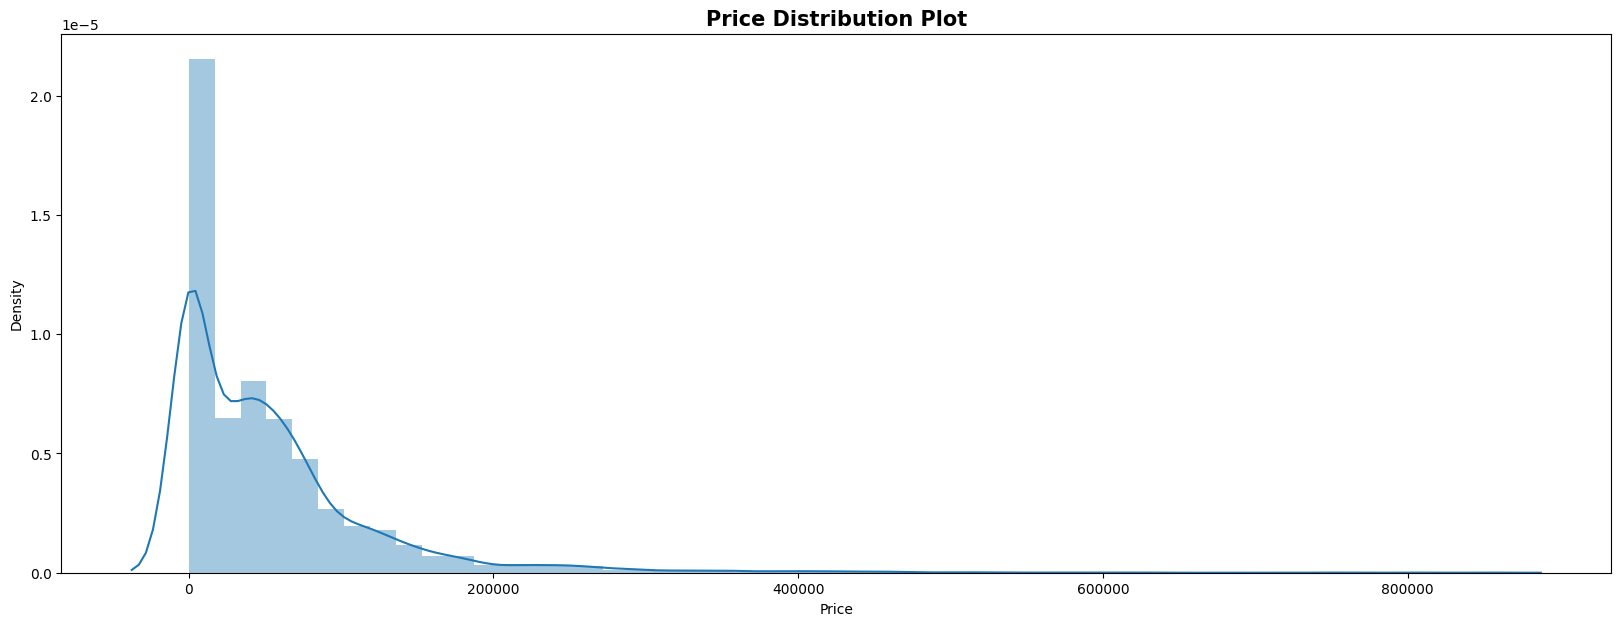

In [63]:

plt.figure(figsize=(20, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Bisa disimpulkan bahwa distribusi data pada variable Price tidak normal karena right-skewed.

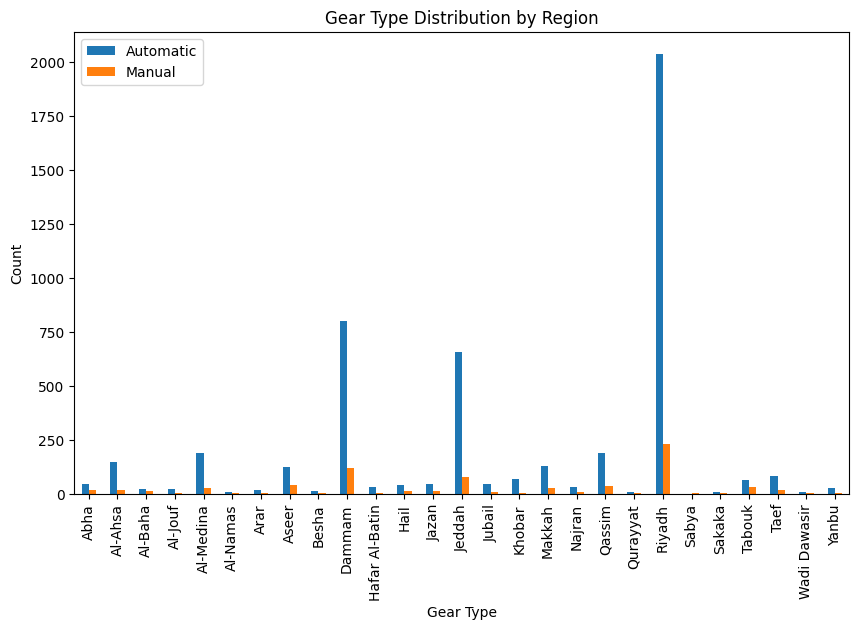

In [64]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each Gear_Type within each Region
counts = df.groupby('Region')['Gear_Type'].value_counts().unstack().fillna(0)

# Create a bar chart of the counts
counts.plot(kind='bar', figsize=(10, 6))

# Add a title and labels
plt.title('Gear Type Distribution by Region')
plt.xlabel('Gear Type')
plt.ylabel('Count')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

Mobil bekas tipe transmisi Automatic dan Manual lebih banyak dijual di Riyadh 

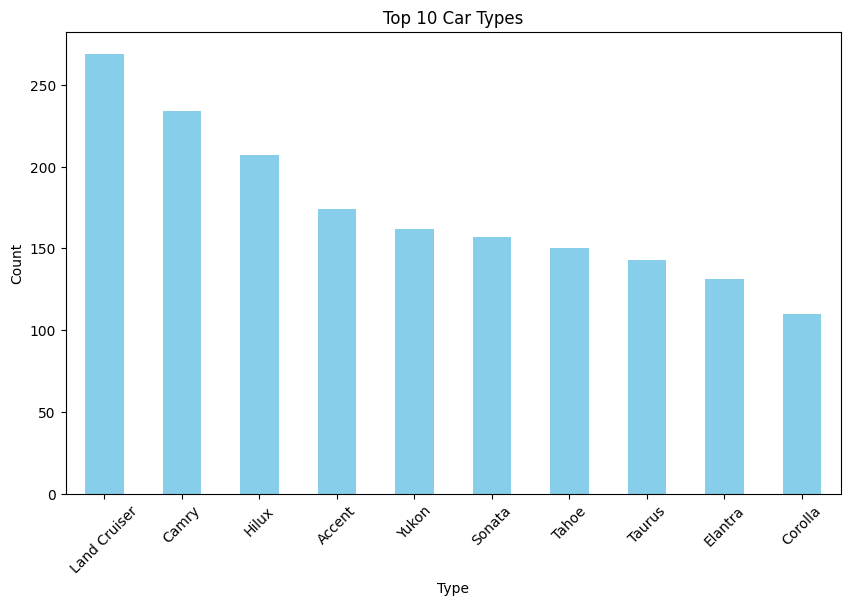

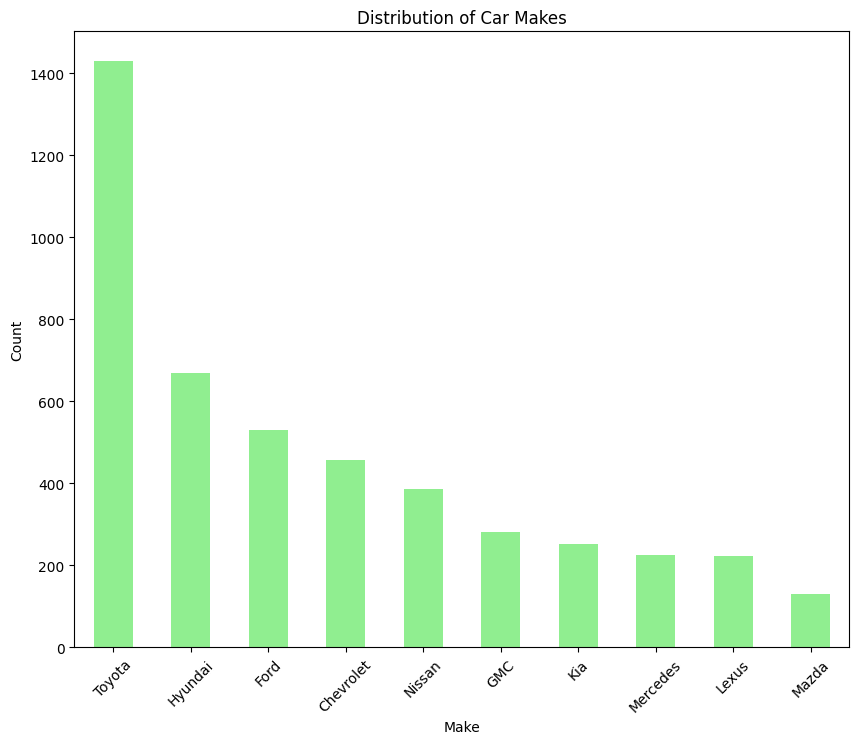

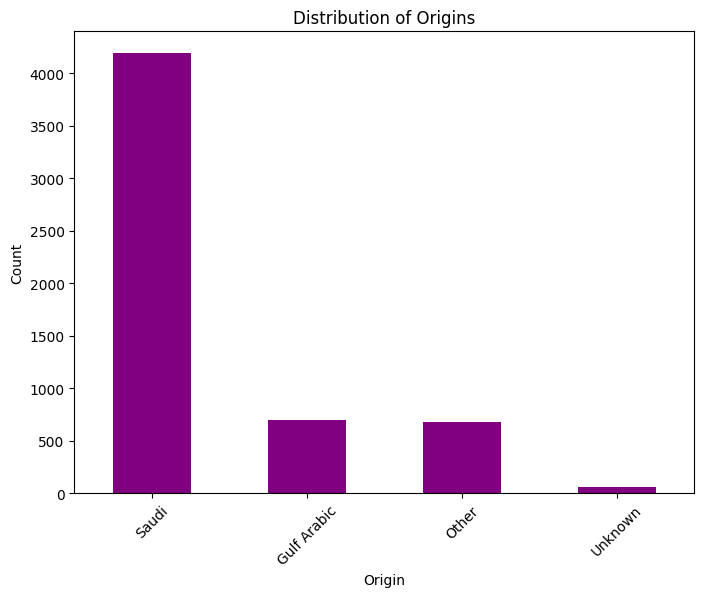

In [65]:
import matplotlib.pyplot as plt

# Ambil 10 teratas dari distribusi variabel Type
top_10_type = df['Type'].value_counts().nlargest(10)
top_10_make = df['Make'].value_counts().nlargest(10)

# Diagram batang untuk variabel Type
plt.figure(figsize=(10, 6))
top_10_type.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotasi label x untuk memperjelas
plt.show()


# Diagram batang untuk variabel Make
plt.figure(figsize=(10, 8))
top_10_make.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotasi label x untuk memperjelas
plt.show()


# Diagram batang untuk variabel Origin
plt.figure(figsize=(8, 6))
df['Origin'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Origins')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotasi label x untuk memperjelas
plt.show()


Dari barplot diatas dapat kita lihat bahwa dari mobil - mobil bekas yang ditawarakan tipe kendaraann Land Cruiser, Camry dan Hilux menjadi tipe yang paling sering ditawarkan dibanding tipe mobil yang lain

Riyadh, Dammam dan Jeddah menjadi Region dengan mobil bekas yang paling banyak untuk ditawarkan

Lalu perusahaan pembuat mobil dari Toyota,Hyundai dan Ford menjadi Top 3 untuk mobil bekas yang ditawarkan

Mobil yang berasal dari Saudi yang paling banyak ditawarkan

# Data Preprocessing

Tujuan dari proses data preprocessing dalam machine learning adalah untuk mempersiapkan data mentah (raw data) menjadi bentuk yang sesuai untuk analisis dan pembuatan model. Proses preprocessing ini sangat penting karena data mentah sering kali tidak sesuai atau tidak siap untuk digunakan langsung dalam pembuatan model. Beberapa tujuan utama dari proses data preprocessing antara lain:

Membersihkan Data: Langkah pertama dalam preprocessing adalah membersihkan data dari nilai yang hilang (missing values), noise, atau outlier yang tidak diinginkan. Membersihkan data akan meningkatkan kualitas data dan mencegah bias dalam model.

Transformasi Data: Beberapa algoritma machine learning memerlukan data dalam format yang spesifik. Oleh karena itu, proses preprocessing melibatkan transformasi data ke dalam format yang sesuai, seperti normalisasi atau standarisasi, agar semua fitur memiliki skala yang serupa atau distribusi yang normal.

Encoding Variabel Kategori: Algoritma machine learning umumnya hanya dapat memproses data numerik. Jika dataset mengandung variabel kategori, seperti jenis kelamin atau kategori produk, variabel tersebut perlu diubah menjadi bentuk numerik melalui proses encoding, seperti one-hot encoding atau label encoding.

Pemilihan Fitur (Feature Selection): Dalam beberapa kasus, dataset mungkin memiliki banyak fitur yang tidak relevan atau kurang informatif. Proses preprocessing melibatkan pemilihan fitur yang paling penting atau informatif untuk dimasukkan ke dalam model, dengan tujuan meningkatkan kinerja model dan mengurangi kompleksitas.

Penanganan Data Tidak Seimbang (Imbalanced Data): Jika dataset memiliki kelas target yang tidak seimbang, di mana satu kelas memiliki frekuensi yang jauh lebih tinggi dari yang lain, perlu dilakukan penanganan khusus untuk mencegah model menjadi bias terhadap kelas mayoritas.

Validasi dan Pembagian Data: Data perlu dibagi menjadi set pelatihan (training set) dan set pengujian (test set) untuk evaluasi model. Proses preprocessing melibatkan pembagian data dengan proporsi yang tepat, serta memastikan bahwa data tidak bocor antara set pelatihan dan pengujian.

Proses data preprocessing ini membantu memastikan bahwa data yang digunakan dalam pembuatan model machine learning siap dan sesuai untuk digunakan, sehingga meningkatkan kinerja dan generalisasi model.

In [66]:
df_model = df.copy()

In [67]:
#Check Jumlah Duplikat
jumlah_duplikat = df.duplicated().sum()

# Tampilkan hasil
print(f'Jumlah duplikat dalam DataFrame: {jumlah_duplikat}')

Jumlah duplikat dalam DataFrame: 4


Ada 4 baris data duplikat maka bisa dihapus saja karena kurang dari 5%

In [68]:
df_model= df_model.drop_duplicates()

In [69]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


In [70]:

df.isna().sum()/df.shape[0]*100

Type           0.0
Region         0.0
Make           0.0
Gear_Type      0.0
Origin         0.0
Options        0.0
Year           0.0
Engine_Size    0.0
Mileage        0.0
Negotiable     0.0
Price          0.0
dtype: float64

<Axes: >

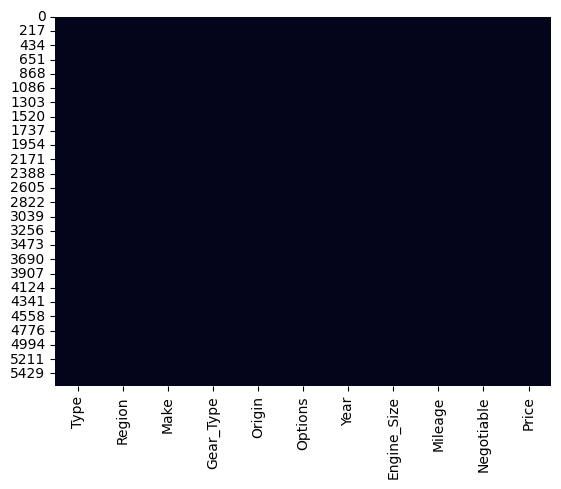

In [71]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False)

Dari data diatas dapat disimpulkan tidak ada missing value

In [72]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


In [73]:
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Bisa dilihat bahwa milage ada outlier yang menyatakan ada mobil dengan 20.000.000 , maka outliers akan dihapus karena bumi memiliki keliling sekitar 40.075 kilometer di sekitar khatulistiwa. Mengemudi sejauh 20.000.000 kilometer akan setara dengan mengelilingi Bumi sekitar 499 kali. Hal ini menunjukkan jarak yang sangat besar yang ditempuh, menekankan mengapa sangat tidak mungkin bagi mobil untuk mengumpulkan jarak tempuh yang begitu tinggi. Dari data diatas juga aga nilai 0 pada kolom harga, maka baris yang memiliki value 0  pada kolom Price akan dihapus karena tidak masuk akal jika menawarkan mobil bekas dengan harga 0. 

In [74]:
# Cek harga sewa yang bernilai 0
df_model[df_model['Price'] == 0]['Price'].count()

1796

In [75]:
count_zero_price = df_model[df_model['Price'] == 0]['Price'].count()
total_entries = df_model.shape[0]
percentage_zero_price = (count_zero_price / total_entries) * 100
print("Persentase harga sewa yang bernilai 0:", percentage_zero_price, "%")

Persentase harga sewa yang bernilai 0: 31.957295373665477 %


In [76]:
df_model = df_model[df_model['Price'] != 0]

In [77]:
df_model.shape

(3824, 11)

In [78]:

columns_list = df_model.columns.tolist()

for column in columns_list:
    if column != 'Negotiable':
        unique_sorted_values = df_model[column].unique()
        unique_sorted_values.sort()

        print(f"Nilai unik diurutkan dari kecil ke besar untuk kolom {column}:")
        print(unique_sorted_values)
        print("\n")

Nilai unik diurutkan dari kecil ke besar untuk kolom Type:
['2' '3' '300' '3008' '301' '360' '4Runner' '5' '500' '5008' '6' '911' 'A'
 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'APV' 'ASX' 'ATS' 'Abeka' 'Acadia' 'Accent'
 'Accord' 'Altima' 'Armada' 'Attrage' 'Aurion' 'Avalon' 'Avante' 'Avanza'
 'Aveo' 'Azera' 'Azkarra' 'B50' 'Beetle' 'Bentayga' 'Blazer' 'Bus County'
 'Bus Urvan' 'C' 'C200' 'C300' 'CC' 'CL' 'CLA' 'CLS' 'CRV' 'CS35'
 'CS35 Plus' 'CS75' 'CS85' 'CS95' 'CT-S' 'CT4' 'CT5' 'CT6' 'CX3' 'CX5'
 'CX7' 'CX9' 'Cadenza' 'Cadillac' 'Camargue' 'Camaro' 'Camry' 'Caprice'
 'Carens' 'Carenz' 'Carnival' 'Cayenne' 'Cayenne S' 'Cayenne Turbo'
 'Cayman' 'Cerato' 'Challenger' 'Charger' 'Cherokee' 'Ciocca' 'City'
 'Civic' 'Coaster' 'Colorado' 'Compass' 'Coolray' 'Copper' 'Cores'
 'Corolla' 'Countryman' 'Coupe' 'Coupe S' 'Cressida' 'Creta' 'Cruze'
 "D'max" 'D-MAX' 'DB9' 'Daily' 'Datsun' 'Defender' 'Delta' 'Discovery'
 'Doblo' 'Dokker' 'Durango' 'Duster' 'Dyna' 'Dzire' 'E' 'EC7' 'EC8' 'ES'
 'Eado' 'Echo Spo

- ada other pada Type
- ada other Make
- ada other dan unknown pada Origin maka kita satukan saja pada other karena secara umum artinya sama.
- ada kesalahan penulisan harga sebesar 1 maka kita akan hapus karena data hanya 1 atau kurang dari 5%

In [79]:
# Menampilkan baris dengan nilai 'other' pada kolom 'Make'
rows_with_other_make = df_model[df_model['Make'] == 'Other']
print(rows_with_other_make)

       Type     Region   Make Gear_Type Origin    Options  Year  Engine_Size  \
663   Other     Qassim  Other    Manual  Other   Standard  1980          2.4   
881   Other    Al-Baha  Other    Manual  Other   Standard  2020          1.1   
1199  Other     Qassim  Other    Manual  Other       Full  2019          8.0   
1253  Other  Al-Medina  Other    Manual  Other   Standard  2009          2.4   
1629  Other     Jeddah  Other    Manual  Other  Semi Full  2021          1.2   

      Mileage  Negotiable   Price  
663      2500       False  220000  
881      2848       False    2000  
1199    24643       False  330000  
1253     1300       False   26000  
1629     3000       False    5500  


In [80]:
other = df_model[(df_model['Make'] == 'Other') & (df_model['Type'] == 'Other')]
result = other['Price'].describe()

print(result)


count         5.000000
mean     116700.000000
std      149929.816914
min        2000.000000
25%        5500.000000
50%       26000.000000
75%      220000.000000
max      330000.000000
Name: Price, dtype: float64


In [81]:
# Identify rows where both 'Make' and 'Type' columns have the value 'Other'
other_rows_index = df_model[(df_model['Make'] == 'Other') & (df_model['Type'] == 'Other')].index

# Drop the identified rows from the DataFrame
df_model = df_model.drop(other_rows_index)


In [82]:
df_model.shape

(3819, 11)

Ada 5 data yang mungkin terjadi kesalahan penulisan karena ada Type (Jenis mobil) yang Other dan Make(Perusahaan Pembuat mobil), yang artinya ada mobil yang dijual tanpa informasi Type dan Make, maka data dihapus saja.

In [83]:
jumlah_value = df_model['Origin'].value_counts()

print(jumlah_value)

Origin
Saudi          2893
Gulf Arabic     495
Other           415
Unknown          16
Name: count, dtype: int64


In [84]:
df_model['Origin'] = df_model['Origin'].replace('Unknown', 'Other')

In [85]:
jumlah_value = df_model['Origin'].value_counts()

print(jumlah_value)

Origin
Saudi          2893
Gulf Arabic     495
Other           431
Name: count, dtype: int64


Pada kolom Origin nilai Unknown akan disamakan dengan other karena secara umum artinya sama.

In [86]:
# Cek harga sewa yang bernilai 0
df_model[df_model['Price'] == 1]['Price'].count()

1

In [87]:
df_model = df_model[df_model['Price'] != 1]

In [88]:
df_model.shape

(3818, 11)

Menghapus value 1 pada kolom harga karena tidak masuk akal menjual mobil bekas dengan harga 1 Riyal.

In [89]:
# Drop the column 'negotiable' from the DataFrame
df_model = df_model.drop('Negotiable', axis=1)


Menghapus kolom Negotiable karena tidak dibutuhkan untuk prediksi harga mobil bekas

In [90]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3818 non-null   object 
 1   Region       3818 non-null   object 
 2   Make         3818 non-null   object 
 3   Gear_Type    3818 non-null   object 
 4   Origin       3818 non-null   object 
 5   Options      3818 non-null   object 
 6   Year         3818 non-null   int64  
 7   Engine_Size  3818 non-null   float64
 8   Mileage      3818 non-null   int64  
 9   Price        3818 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.1+ KB


# Outliers Detection

In [91]:
df_model.shape

(3818, 10)

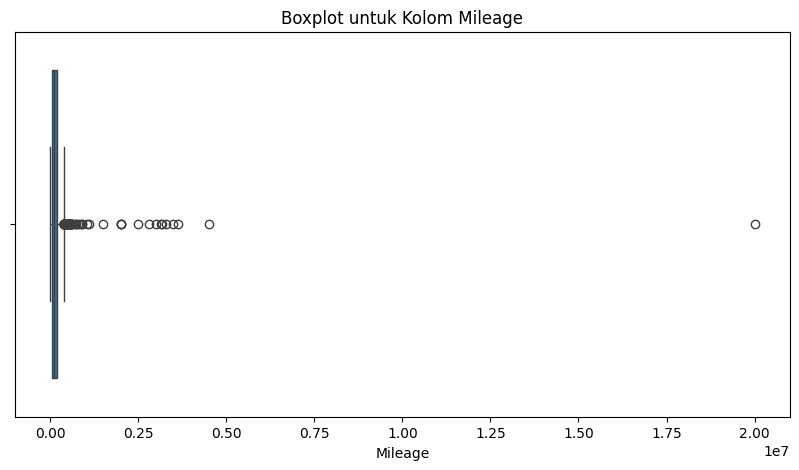

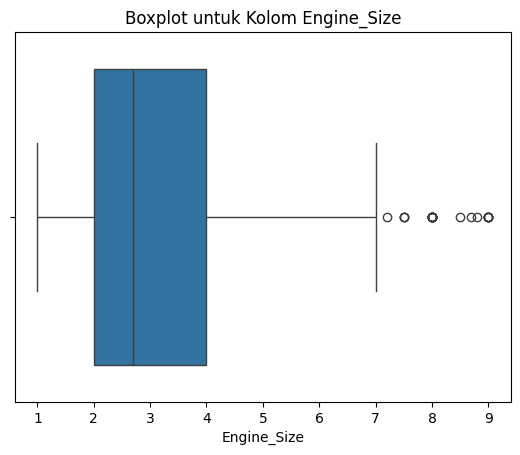

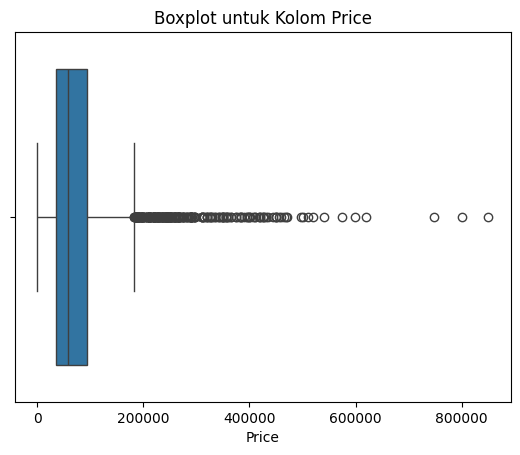

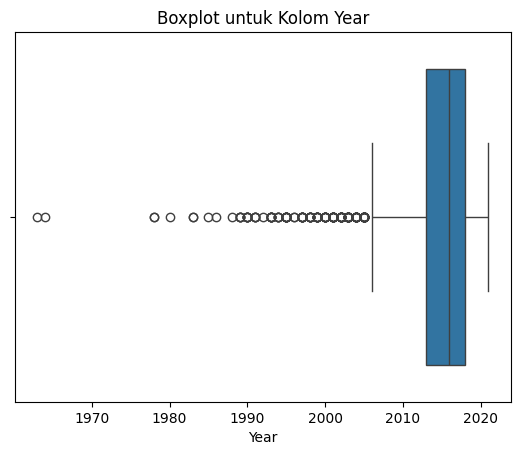

In [92]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_model['Mileage'])
plt.title('Boxplot untuk Kolom Mileage')
plt.xlabel('Mileage')
plt.show()

sns.boxplot(x=df_model['Engine_Size'])
plt.title('Boxplot untuk Kolom Engine_Size')
plt.xlabel('Engine_Size')
plt.show()

sns.boxplot(x=df_model['Price'])
plt.title('Boxplot untuk Kolom Price')
plt.xlabel('Price')
plt.show()

sns.boxplot(x=df_model['Year'])
plt.title('Boxplot untuk Kolom Year')
plt.xlabel('Year')
plt.show()


Dari boxplot diatas bisa dilihat ada outliers pada variable Price, Engine_Size, Year dan Mileage tapi karena outliers yang extreme hanya ada di Year, Mileage dan Price maka outliers pada variabel Mileage,Year dan Price saja yang akan dihapus.

In [93]:
q1 = df_model['Mileage'].quantile(0.25)
q3 = df_model['Mileage'].quantile(0.75)
iqr = q3 - q1
limit =iqr*1.5

limit_bawah = q1 - limit
limit_atas = q3 + limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}')   


limit_bawah: -153216.25
limit_atas: 384729.75


In [94]:
# Drop the Outliers
df_model = df_model[(df_model['Price'] >= 10000)]
df_model = df_model[(df_model['Mileage'] <= 5230000)]
df_model = df_model[(df_model['Year'] >= 1997)]



Dari hasil pencarian di internet untuk beberapa website yang menjual mobil bekas seperti [klik disini](https://ksa.carswitch.com/en/saudi/used-cars/search?keyword=316page=1)
mobil bekas paling murah berada di 10.000 riyal, maka kita akan menghapus harga mobil dibawah 10.000 riyal.

Mileage mobil tertinggi pada mobil bekas ada pada 5230000 KM berdasarka dari artikel ini [klik disini](https://www.drive.com.au/caradvice/the-highest-mileage-cars-in-australia/)

Situs Syarah menjual mobil modern dan bukan mobil antik, berdasarkan artikel ini [klik disini](https://en.wikipedia.org/wiki/Antique_car) mobil antik adalah mobil yang dibuat 25 tahun yang lalu, karena data diambil tahun 2022 maka diasumsikan tahun 1997 adalah mobil antik.



In [95]:
df_model.shape

(3679, 10)

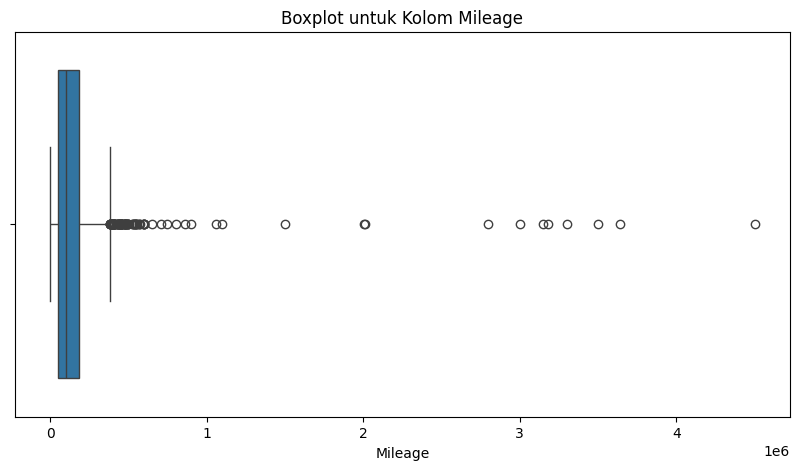

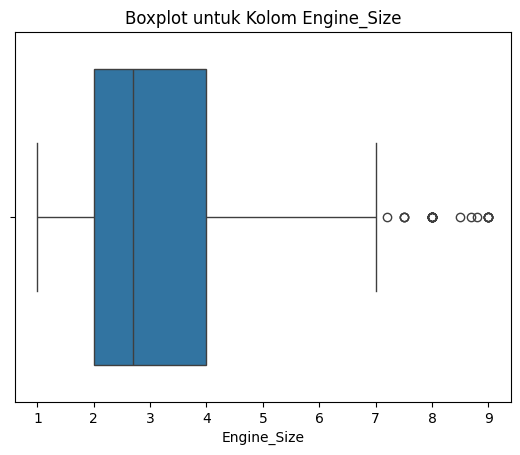

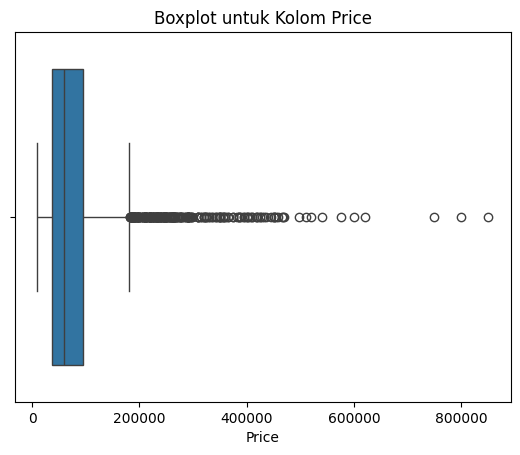

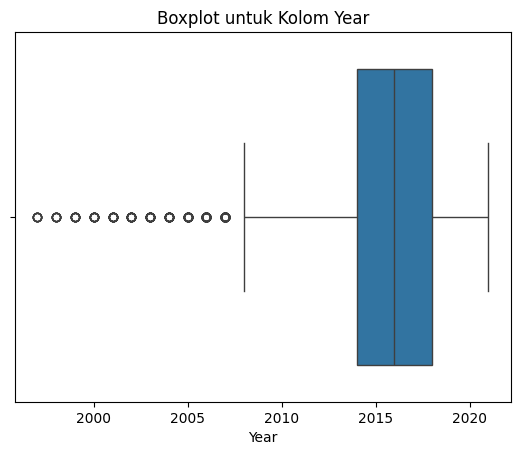

In [96]:
plt.figure(figsize=(10 , 5))

sns.boxplot(x=df_model['Mileage'])
plt.title('Boxplot untuk Kolom Mileage')
plt.xlabel('Mileage')
plt.show()

sns.boxplot(x=df_model['Engine_Size'])
plt.title('Boxplot untuk Kolom Engine_Size')
plt.xlabel('Engine_Size')
plt.show()

sns.boxplot(x=df_model['Price'])
plt.title('Boxplot untuk Kolom Price')
plt.xlabel('Price')
plt.show()

sns.boxplot(x=df_model['Year'])
plt.title('Boxplot untuk Kolom Year')
plt.xlabel('Year')
plt.show()

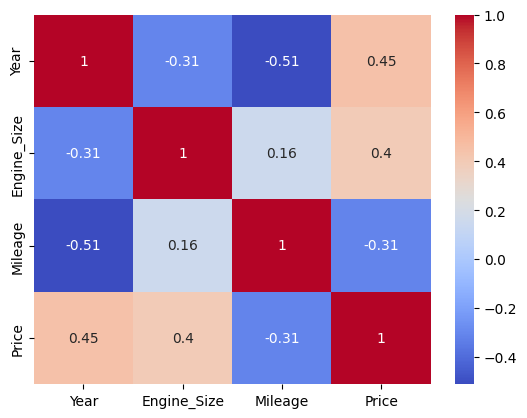

In [97]:
# Filter dataframe untuk hanya mempertahankan kolom-kolom numerik dan boolean
numeric_columns = df_model.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df_model[numeric_columns]

# Hitung korelasi
correlation = numeric_df.corr(method='spearman')

# Visualisasikan korelasi menggunakan heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


Dari heatmap diatas bahwa fitur yang paling berpengaruh pada Price adalah Year lalu diikuti oleh Engine_Size dan yang paaling sedikit pengaruhnya adalah Mileage.

# Modeling

In [98]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report,make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

__Encoding__

In [99]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Make','Region'])
], remainder='passthrough')

In [100]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Make', 'Region'])])

__Data Splitting__

In [101]:
# Memisahkan data independen variabel dengan target
x = df_model.drop(['Price'], axis=1)
y = df_model['Price']

In [102]:
xtrain,xtest,ytrain,ytest= train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1
)

__Benchmarking__

In [103]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
gb = GradientBoostingRegressor(random_state=1)
nn = MLPRegressor(random_state=1)
hr = HuberRegressor()            

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_nn = TransformedTargetRegressor(nn, func=np.log, inverse_func=np.exp)
log_hr = TransformedTargetRegressor(hr, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_ridge, log_lasso, log_gb, log_nn, log_hr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []




# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),  
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())




[-55312.1771367  -43537.54962174 -52341.66171982 -41266.44493632
 -46700.12310274] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28332.91645372 -25824.17061969 -26576.18165951 -23943.31548607
 -25688.44965986] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.34557047 -0.34718656 -0.35717681 -0.34003595 -0.32293468] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-48753.74315425 -38177.92316186 -53700.48335511 -37956.07829038
 -42651.86154583] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-26360.78628968 -23141.70781888 -25508.68769944 -23575.0072223
 -23650.13590271] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.38701344 -0.38302913 -0.41870751 -0.41705618 -0.36777962] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-60699.8235355  -44754.47608511 -55300.83173255 -47171.46084141
 -46117.3726354 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-26860.92750255 -21206.64257122 -25194.42078378 -24401.99489522
 -22796.57823129] TransformedTargetRegressor(func=<ufunc 'log'>, inve

In [104]:

pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 
              'Ridge Regression', 'Lasso Regression', 'Gradient Boosting Regressor', 'Neural Network', 'HuberRegressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})



,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-47831.591303,5274.847119,-26073.006776,1421.672629,-0.342581,0.011275
1,KNN Regressor,-44248.017901,6142.197205,-24447.264987,1256.097915,-0.394717,0.019981
2,DecisionTree Regressor,-50808.792966,6162.876935,-24092.112797,1948.424642,-0.336113,0.018285
3,RandomForest Regressor,-36352.585802,6453.163644,-17096.498554,1293.218017,-0.224933,0.009414
4,XGBoost Regressor,-33434.740275,7950.317725,-15719.386272,1571.876161,-0.212410,0.017885
5,Ridge Regression,-47838.054357,5272.679025,-26074.301620,1422.057842,-0.342588,0.011273
6,Lasso Regression,-73910.243850,4527.351379,-43186.482324,1753.879072,-0.673721,0.017437
7,Gradient Boosting Regressor,-38534.708595,4943.327262,-19853.293562,1415.549991,-0.253457,0.012941
8,Neural Network,-45194.028284,7527.926388,-23976.091449,1206.113983,-0.332293,0.009978
9,HuberRegressor,-48626.289472,5712.378501,-25822.764936,1563.180316,-0.330391,0.013079


Terdapat perbedaan yang cukup mencolok antara RMSE dan MAE, yang disebabkan oleh pengkuadratan nilai residual dalam perhitungan RMSE. Ini mengakibatkan RMSE memberikan bobot lebih besar pada error yang besar. Dengan demikian, terdapat perbedaan yang signifikan antara nilai-nilai RMSE dan MAE karena adanya error besar yang dihasilkan oleh semua algoritma yang digunakan.

Berdasarkan hasil RMSE MAE dan MAPE, XGBoost dan Random Forest menunjukan performa terbaik sebagai model. 

Selanjutnya, kita akan melakukan prediksi pada set data uji menggunakan dua model terbaik sebagai benchmark, yaitu XGBoost dan RandomForest.

In [105]:
# Benchmark 2 model terbaik
models = {
    'xgb': XGBRegressor(random_state=1),
    'rf' : RandomForestRegressor(random_state=1)
    
    
}

score_rmse = []
score_mae = []
score_mape = []


# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))


score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
xgb,36532.963220,18601.707828,0.268470
rf,40152.503122,19214.682505,0.265602


Dari data diatas dapat disimpulkan bahwa dari RMSE dan MAE XGBoost memiliki hasil yang terbaik, namun MAPE hasil terbaik adalah Random Forest. Maka yang dpilih adalah XGBoost karena model ini memiliki hasil lebih baik.

__Hyperparamete Tuning__

In [106]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [107]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)


In [108]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [109]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.639763,0.024608,0.031720,0.001933,0.9,0.059948,119,8,0.05,5,...,1227.681075,1,-0.264945,-0.246003,-0.283581,-0.278375,-0.227816,-0.260144,0.020735,1
17,0.446209,0.016144,0.030317,0.003707,0.6,0.001,190,5,0.04,9,...,969.693835,2,-0.286950,-0.264191,-0.286446,-0.274443,-0.252297,-0.272865,0.013294,2
3,0.816815,0.210719,0.039295,0.005150,0.5,0.021544,166,8,0.1,9,...,985.028333,3,-0.295319,-0.337763,-0.339772,-0.332216,-0.307187,-0.322452,0.017883,6
20,0.298722,0.010463,0.031317,0.005071,0.9,0.007743,143,4,0.38,6,...,1317.867828,4,-0.315896,-0.300836,-0.331266,-0.308017,-0.304687,-0.312140,0.010772,3
22,0.329917,0.014567,0.033911,0.004326,0.7,0.002783,155,4,0.25,8,...,1364.014954,7,-0.338658,-0.354326,-0.346417,-0.336604,-0.329422,-0.341086,0.008553,9


In [110]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -33352.62898175129
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


__Predict to Test Set with the Tuned Model__

In [111]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(xtest)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(ytest, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(ytest, y_pred)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning }, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,35712.810603,16944.607945,0.244395


__Comparison__

In [112]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['xgb']).T

,RMSE,MAE,MAPE
xgb,36532.96322,18601.707828,0.26847


In [113]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,35712.810603,16944.607945,0.244395


Untuk menentukan model yang lebih baik, kita harus memperhatikan metrik evaluasi yang berbeda, dan dalam beberapa konteks, mungkin ada trade-off antara mereka. Namun, secara umum, kita ingin mengurangi nilai RMSE dan MAE, serta MAPE sebanyak mungkin.

Dalam kasus ini, setelah tuning, model XGBoost (XGB) memiliki nilai RMSE dan MAE yang lebih rendah (35712.810603 dan 16944.607945) dibandingkan dengan nilai sebelum tuning (36532.96322 dan 18601.707828). Hal ini menunjukkan bahwa setelah tuning, model cenderung memberikan prediksi yang lebih dekat dengan harga sebenarnya, sehingga lebih baik dalam hal akurasi.

Secara keseluruhan, karena penurunan dalam RMSE, MAE, dan MAPE adalah indikator yang lebih signifikan dari kinerja model dalam hal akurasi prediksi, model XGBoost setelah tuning kemungkinan lebih baik dalam melakukan prediksi harga mobil bekas dibandingkan dengan model sebelum tuning.


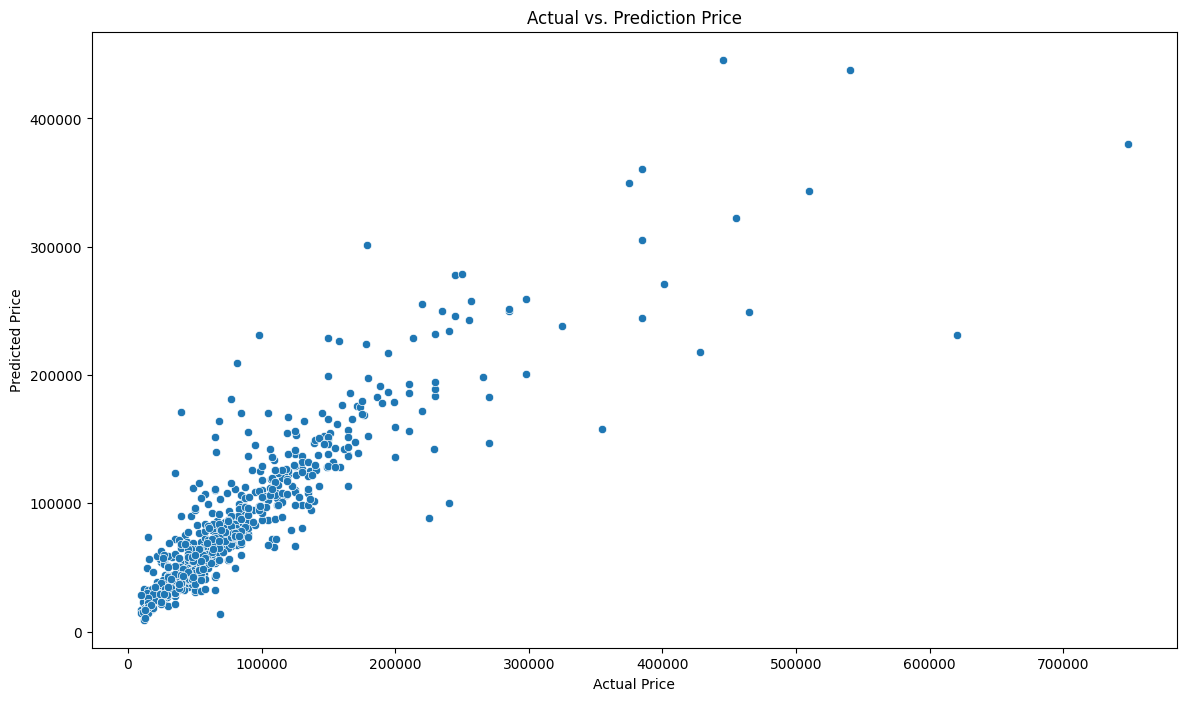

In [114]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=ytest, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Dari grafik di atas, terlihat bahwa model cenderung bekerja efektif pada rentang harga 10.000 hingga 200.000. Namun, semakin tinggi harga mobil, model cenderung bersifat underestimate di mana model memprediksi harga yang lebih rendah dari aktualnya dengan kesalahan yang signifikan. Meskipun demikian, dengan nilai MAPE sekitar 24%, model ini dapat dianggap 'reasonable forecasting'.(Lewis,1982)

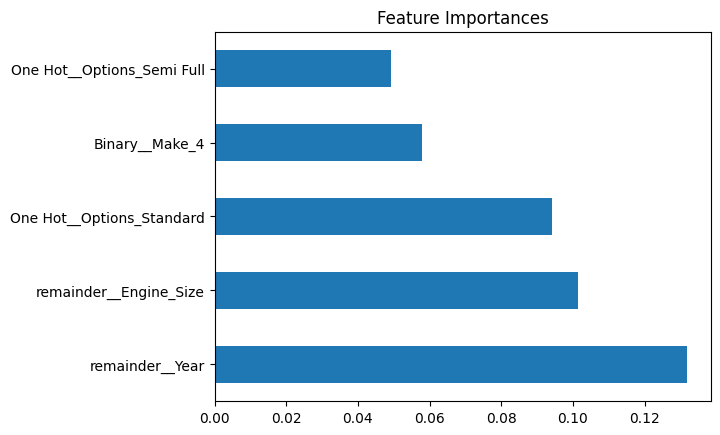

In [115]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

__Kesimpulan:__
Berdasarkan evaluasi, fitur 'Year' dan 'Engine_Size' telah teridentifikasi sebagai faktor yang signifikan dalam menentukan harga mobil bekas dalam model ini.

Dengan menggunakan metrik evaluasi seperti RMSE, MAE, dan MAPE, kita menyimpulkan bahwa model memiliki tingkat akurasi yang dapat diterima, dengan MAPE sekitar 24%. Dengan kata lain, rata-rata prediksi harga mobil bekas memiliki kesalahan sekitar 24% dari harga sebenarnya, terutama dalam rentang harga yang telah dilatih oleh model (minimal harga 10.000).

Meskipun demikian, masih ada potensi untuk meningkatkan kinerja model guna memberikan prediksi yang lebih akurat. Langkah-langkah pengembangan selanjutnya dapat mencakup penambahan fitur, eksplorasi model yang lebih kompleks, atau penyetelan lebih lanjut pada hyperparameter.

Untuk mendapatkan wawasan tambahan tentang kinerja model, disarankan untuk melakukan uji A/B terhadap model yang ada. Dengan uji A/B, kita dapat mengevaluasi efektivitas penggunaan model dalam prediksi harga mobil bekas. Hasil dari uji A/B akan memberikan pemahaman yang lebih baik tentang kekurangan model dan area yang memerlukan perbaikan atau peningkatan.



__Rekomendasi__
- Menambahkan data terkini untukmobil bekas di Arab Saudi yang ditawarkan, jika memungkinakan menambahkan fitur baru seperti Riwayat Servis dan Perawatan: Mobil yang memiliki catatan perawatan yang baik dan dilakukan secara teratur biasanya memiliki nilai jual yang lebih tinggi karena pembeli akan merasa lebih percaya diri terhadap kualitas mobil tersebut.

- Menggunakan model prediksi harga mobil bekas kita dapat mnegembangkan model untuk menentukan harga  mobil bekas yang baru masuk ke pasar. Dengan menganalisis faktor-faktor seperti usia mobil, kondisi, dan menambahkan fitur baru seperti Riwayat Servis dan Perawatan kita dapat memberikan estimasi harga yang optimal untuk mobil bekas yang akan dijual.

- Mengecek Prediksi dengan Nilai Error Tinggi: Pertama, kita perlu menghitung error untuk setiap prediksi model terhadap harga mobil bekas. Kita dapat menggunakan metrik evaluasi seperti Mean Absolute Error (MAE) atau Root Mean Squared Error (RMSE) untuk mengukur kesalahan prediksi.Mengelompokkan Error: Setelah menghitung error untuk setiap prediksi, kita dapat mengelompokkan error ke dalam grup overestimation dan underestimation. Kita dapat menggunakan persentil 5% teratas dari error positif sebagai grup overestimation, dan persentil 5% teratas dari error negatif sebagai grup underestimation. Sementara itu, sisanya akan termasuk dalam grup mayoritas.Menganalisis Hubungan dengan Variabel Independen: Kita dapat menggunakan analisis statistik seperti regresi linier atau pengujian hipotesis untuk mengevaluasi hubungan antara error tersebut dengan variabel independen. Ini akan membantu kita menentukan variabel mana yang memiliki pengaruh signifikan terhadap error model.Penerapan Feature Engineering: Berdasarkan hasil analisis, kita dapat menentukan tindakan perbaikan yang diperlukan. Ini bisa termasuk penerapan feature engineering tambahan, seperti menambahkan atau mengubah fitur-fitur yang ada, untuk meningkatkan kinerja model.Training Ulang Model: Setelah melakukan perbaikan pada fitur-fitur atau variabel yang relevan, kita dapat melatih ulang model menggunakan data yang telah diperbarui. Langkah ini memungkinkan model untuk mempelajari pola yang lebih baik dan menghasilkan prediksi yang lebih akurat.Evaluasi Kembali: Akhirnya, kita dapat mengevaluasi kembali kinerja model yang telah diperbarui menggunakan metrik evaluasi yang sama untuk memastikan bahwa perbaikan yang diimplementasikan telah menghasilkan peningkatan yang signifikan dalam akurasi prediksi.Dengan mengikuti langkah-langkah ini, kita dapat mendapatkan wawasan yang lebih baik tentang faktor-faktor apa yang menyebabkan model menghasilkan error yang tinggi, dan kita dapat melakukan tindakan perbaikan yang tepat untuk meningkatkan kinerja model.

__Save Model__

In [116]:
#Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(xtrain, ytrain)

pickle.dump(estimator, open('Model_PrediksiHargaMobilBekas_XGB.sav', 'wb'))

In [117]:
#Load model
filename = 'Model_PrediksiHargaMobilBekas_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [118]:
np.sqrt(mean_squared_error(ytest, loaded_model.predict(xtest)))

36532.9632195234